## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# set version
version = "CIFAR10-CIFARNet"

# load metrics
metrics = pd.read_csv(f"lightning_logs/{version}/metrics.csv")

# merge entries on the same epoch
metrics = metrics.groupby("epoch").first()
for v_info in ("vsuff", "vmin"):
    for dataset in ("train", "val"):
        metrics[f"{v_info}_0_{dataset}"] = metrics[f"{v_info}_0_{dataset}"].ffill()
metrics.to_csv(f"lightning_logs/{version}/cleaned_metrics.csv")
display(metrics)

# initial legend elements
base_handles = [
    Line2D([], [], color="gray", linestyle=linestyle) for linestyle in ("-", "--")
]

,nc_layer_1_train,nc_layer_1_val,nc_layer_2_train,nc_layer_2_val,nc_layer_3_train,nc_layer_3_val,nc_output_train,nc_output_val,step,train_acc,...,vmin_3_train,vmin_3_val,vsuff_0_train,vsuff_0_val,vsuff_1_train,vsuff_1_val,vsuff_2_train,vsuff_2_val,vsuff_3_train,vsuff_3_val
epoch,,,,,,,,,,,,,,,,,,,,,
0,196.164886,201.800507,154.598175,170.366562,189.257614,164.652420,237.825974,139.829361,24,0.343181,...,0.423012,0.409487,3.299696,3.297079,3.291609,3.289481,3.106482,3.087828,1.331911,1.334615
1,174.947754,182.163696,128.647614,119.767250,145.513138,108.914909,163.477402,103.105850,49,0.489998,...,0.413094,0.412192,3.299696,3.297079,3.298284,3.294863,3.201328,3.212768,1.647500,1.538396
2,161.117676,169.950684,100.382301,101.848190,95.663177,82.832092,93.349472,86.925964,74,0.567345,...,0.395061,0.374322,3.299696,3.297079,3.298231,3.297875,3.258852,3.238410,1.919358,1.755928
3,149.178116,158.492783,89.363876,86.643005,68.905251,64.471680,63.188168,60.414730,99,0.632734,...,0.373420,0.395061,3.299696,3.297079,3.297304,3.298488,3.269349,3.275125,2.146583,1.893885
4,147.554077,156.486923,75.197899,78.428513,55.526226,56.771736,45.603909,52.911369,124,0.687128,...,0.372519,0.371617,3.299696,3.297079,3.293370,3.298312,3.275794,3.276682,2.340445,2.020347
5,145.086639,150.336075,67.010727,70.793274,44.761311,48.987881,33.610374,44.541870,149,0.735648,...,0.379732,0.340058,3.299696,3.297079,3.298843,3.298967,3.284571,3.283437,2.510412,2.083239
6,138.835007,147.873505,62.623642,69.264900,37.242630,44.487019,26.361912,37.402180,174,0.776245,...,0.340959,0.359895,3.299696,3.297079,3.300481,3.301175,3.287058,3.284656,2.635972,2.145906
7,140.632568,145.924347,60.352024,63.150188,34.825264,39.871681,22.040867,33.845684,199,0.826194,...,0.373420,0.334647,3.299696,3.297079,3.299601,3.302771,3.290411,3.287664,2.806728,2.202261
8,136.589691,143.368469,58.099533,62.863194,29.998762,38.911499,17.313728,31.364481,224,0.865749,...,0.360796,0.328336,3.299696,3.297079,3.299654,3.301235,3.292412,3.287770,2.924060,2.223226


In [3]:
def plot_metrics(columns, labels, ylabel, xlabel="epoch", dummy=False):
    for i, dataset_cols in enumerate(columns):
        if dummy:  # dummy plot to iterate colour cycle
            plt.plot([])
        plt.plot(metrics.index, metrics[dataset_cols], linestyle=["-", "--"][i])
        plt.gca().set_prop_cycle(None)
    plt.xlabel(xlabel)
    plt.xticks(range(0, metrics.shape[0], 5))
    plt.ylabel(ylabel)
    plt.legend(
        base_handles + plt.gca().get_lines()[int(dummy) :],
        ["Train", "Validation"] + labels,
    )
    plt.show()

## Loss and Accuracy Curves

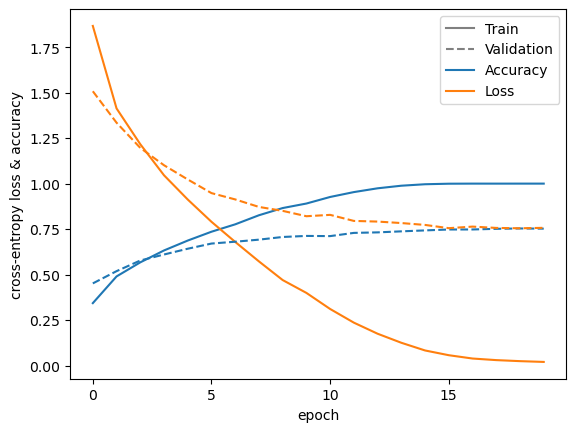

In [4]:
cols = [metrics.filter(like=f"{dataset}_").columns for dataset in ("train", "val")]
plot_metrics(cols, ["Accuracy", "Loss"], "cross-entropy loss & accuracy")

## Neural Collapse

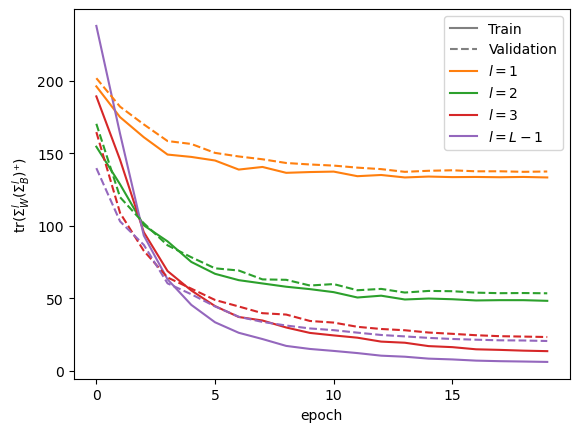

In [5]:
nc_cols = metrics.filter(like="nc_").columns
nc_cols = [nc_cols[nc_cols.str.contains(dataset)] for dataset in ("train", "val")]
plot_metrics(
    nc_cols,
    [rf"$l = {layer}$" for layer in (1, 2, 3, "L-1")],
    r"$\operatorname{tr}(Σ_W^l(Σ_B^l)⁺)$",
    dummy=True,
)
# for i, dataset in enumerate(("train", "val")):
#     dataset_nc_cols = nc_cols[nc_cols.str.contains(dataset)]
#     plt.plot([])  # dummy plot to iterate color cycle
#     plt.plot(metrics.index, metrics[dataset_nc_cols], linestyle=["-", "--"][i])
#     plt.gca().set_prop_cycle(None)
# plt.legend(
#     base_handles + plt.gca().get_lines()[1:],
#     ["Train", "Validation"] + [rf"$l = {layer}$" for layer in (1, 2, 3, "L-1")],
# )
# plt.xlabel("epoch")
# plt.xticks(range(20))
# plt.ylabel(r"$\operatorname{tr}(Σ_W^l(Σ_B^l)⁺)$")
# # plt.ylim(0, 20)
# plt.show()

## 𝒱-Information

### Sufficiency

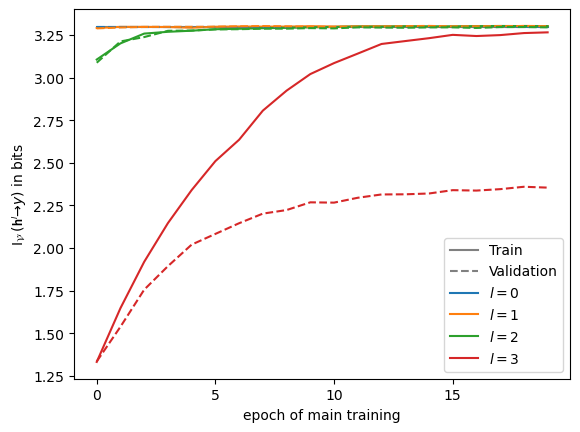

In [6]:
vsuff_cols = [
    metrics.filter(regex=f"vsuff_[0-9]_{dataset}").columns
    for dataset in ("train", "val")
]
plot_metrics(
    vsuff_cols,
    [rf"$l = {layer}$" for layer in (0, 1, 2, 3)],
    r"$\operatorname{I}_{\mathcal{V}ˡ}(𝗵ˡ → y)$ in bits",
    xlabel="epoch of main training",
)

### Minimality

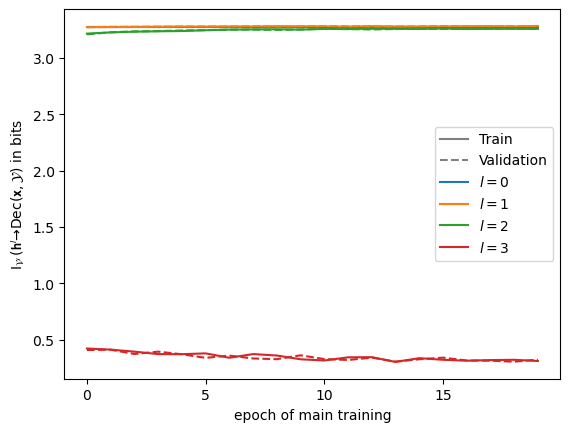

In [7]:
vmin_cols = [
    metrics.filter(regex=f"vmin_[0-9]_{dataset}").columns
    for dataset in ("train", "val")
]
plot_metrics(
    vmin_cols,
    [rf"$l = {layer}$" for layer in (0, 1, 2, 3)],
    r"$\operatorname{I}_{\mathcal{V}ˡ}(𝗵ˡ → \operatorname{Dec}(𝘅, \mathcal{Y})$ in bits",
    xlabel="epoch of main training",
)

### Information Plane Analysis

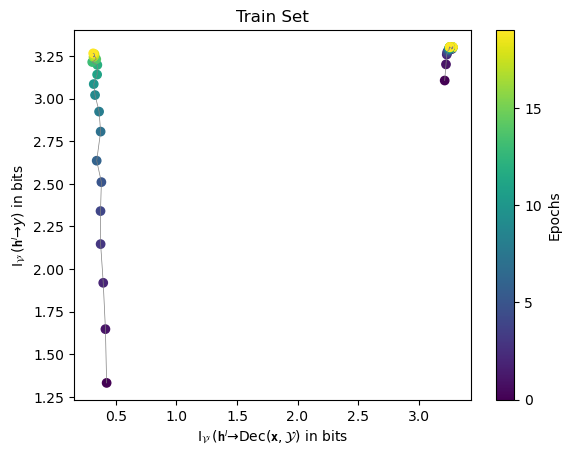

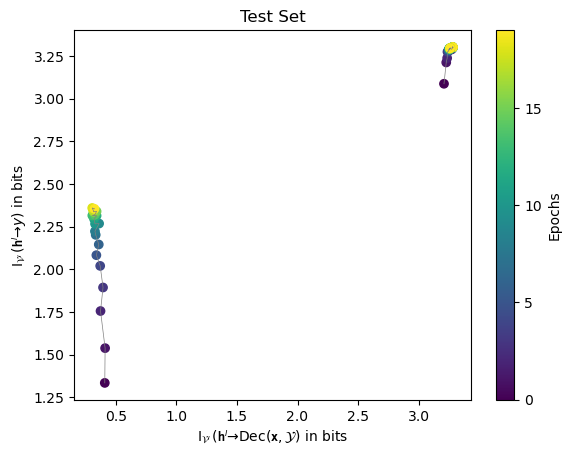

In [8]:
for i, dataset in enumerate(("Train", "Test")):
    for vmin, vsuff in zip(vmin_cols[i], vsuff_cols[i]):
        x = metrics[vmin]
        y = metrics[vsuff]
        plt.scatter(x, y, cmap="viridis", c=metrics.index)
        plt.plot(x, y, color="gray", linewidth=0.5)
    plt.xlabel(r"$\operatorname{I}_{\mathcal{V}ˡ}(𝗵ˡ → \operatorname{Dec}(𝘅, \mathcal{Y})$ in bits")
    plt.ylabel(r"$\operatorname{I}_{\mathcal{V}ˡ}(𝗵ˡ → y)$ in bits")
    plt.colorbar(label="Epochs", ticks=range(0, metrics.shape[0], 5))
    plt.title(f"{dataset} Set")
    plt.show()